In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tpot import TPOTRegressor
from datetime import datetime
import calendar
from sklearn.model_selection import RepeatedKFold


In [143]:
train = pd.read_csv('train_E1GspfA.csv')


In [130]:
train.date.count()

18247

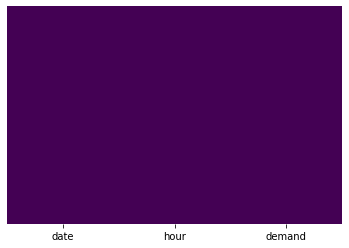

In [131]:
#CHECKING FOR NULL VALUES
import seaborn as sns
%matplotlib inline
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

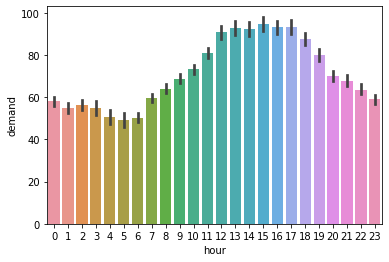

In [133]:
sns.barplot(x='hour',y='demand',data=train)

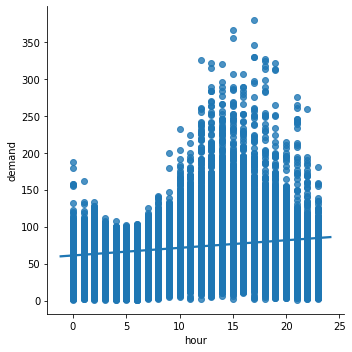

In [134]:
sns.lmplot(x='hour',y='demand',data=train)

In [37]:
!pip install tpot

In [135]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [136]:
train.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,73.991451
std,6.544963,41.678988
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,98.000000
max,23.000000,379.000000


In [144]:
def findDay(date):
    born =datetime.strptime(date, "%Y-%m-%d").weekday()
    return born

In [145]:
weekday=[]
for x,y in enumerate(train["date"]):
    weekday.append(findDay(y))

In [147]:
train["weekday"]=weekday
train.head()


,date,hour,demand,weekday
0,2018-08-18,9,91,5
1,2018-08-18,10,21,5
2,2018-08-18,13,23,5
3,2018-08-18,14,104,5
4,2018-08-18,15,81,5


In [148]:
def findMonth(date):
    born =datetime.strptime(date, "%Y-%m-%d")
    return born.month

In [149]:
month=[]
for x,y in enumerate(train["date"]):
    month.append(findMonth(y))
    print(findMonth(y))
    

8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9


In [150]:
train["month"]=month

In [152]:
train.head()

,date,hour,demand,weekday,month
0,2018-08-18,9,91,5,8
1,2018-08-18,10,21,5,8
2,2018-08-18,13,23,5,8
3,2018-08-18,14,104,5,8
4,2018-08-18,15,81,5,8


In [35]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [41]:
model = TPOTRegressor(generations=5, population_size=50, scoring='neg_mean_absolute_error', cv=cv, verbosity=2, random_state=1, n_jobs=-1)

In [167]:
x=train[["hour","weekday","month"]]

In [170]:
y=train[["demand"]]

In [171]:
y.head()

,demand
0,91
1,21
2,23
3,104
4,81


In [45]:
# perform the search
model.fit(x, y)
# export the best model
model.export('tpot_insurance_best_model.py')

C:\Users\srpap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -28.87345156551471

Generation 2 - Current best internal CV score: -28.87345156551471

Generation 3 - Current best internal CV score: -28.87345156551471

Generation 4 - Current best internal CV score: -28.873178253672773

Generation 5 - Current best internal CV score: -28.85537613739745

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.99, learning_rate=0.5, loss=huber, max_depth=3, max_features=0.45, min_samples_leaf=8, min_samples_split=2, n_estimators=100, subsample=0.9000000000000001)


In [181]:
test=  pd.read_csv('test_6QvDdzb.csv')
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [182]:
def findDay(date):
    born =datetime.strptime(date, "%Y-%m-%d").weekday()
    return born

In [183]:
weekday=[]
for x,y in enumerate(test['date']):
    weekday.append(findDay(y))

In [184]:
test["weekday"]=weekday
test.head()


,date,hour,weekday
0,2021-03-01,0,0
1,2021-03-01,1,0
2,2021-03-01,2,0
3,2021-03-01,3,0
4,2021-03-01,5,0


In [185]:
def findMonth(date):
    born =datetime.strptime(date, "%Y-%m-%d")
    return born.month

In [186]:
month=[]
for x,y in enumerate(test["date"]):
    month.append(findMonth(y))
    print(findMonth(y))
    

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [187]:
test["month"]=month

In [188]:
test.head()

,date,hour,weekday,month
0,2021-03-01,0,0,3
1,2021-03-01,1,0,3
2,2021-03-01,2,0,3
3,2021-03-01,3,0,3
4,2021-03-01,5,0,3


In [189]:
x_test=test[["hour","weekday","month"]]

In [165]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [172]:
exported_pipeline = GradientBoostingRegressor(alpha=0.99, learning_rate=0.5, loss='huber', max_depth=3, max_features=0.45, min_samples_leaf=8, min_samples_split=2, n_estimators=100, subsample=0.9000000000000001)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 1)
# fit the model
exported_pipeline.fit(x, y)

C:\Users\srpap\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.99, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='huber',
                          max_depth=3, max_features=0.45, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.9000000000000001,
                          tol=0.0001, validation_fraction=0.1, verbose=0,
                          warm_start=False)

In [190]:
yhat = exported_pipeline.predict(x_test)
yhat

array([59.3449653 , 46.80978351, 49.91823206, ..., 65.7684931 ,
       57.53665523, 57.04852418])

In [193]:
results=pd.DataFrame(yhat)
results.head()

,0
0,59.344965
1,46.809784
2,49.918232
3,49.338959
4,47.656277


In [194]:
test['demand']=yhat
test.head()


,date,hour,weekday,month,demand
0,2021-03-01,0,0,3,59.344965
1,2021-03-01,1,0,3,46.809784
2,2021-03-01,2,0,3,49.918232
3,2021-03-01,3,0,3,49.338959
4,2021-03-01,5,0,3,47.656277


In [195]:
test.drop(["weekday","month"],axis=1,inplace=True)

In [196]:
test.to_csv('solution.csv',index=False)